In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import svm

In [2]:
kf = model_selection.KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

### Questão 01

In [3]:
X,y = datasets.load_boston(return_X_y=True)

In [4]:
X_df = pd.DataFrame(X)

In [5]:
X_df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [6]:
def standardize(X):
    X_std = np.copy(X)
    n_cols = X.shape[1]
    for i in range(n_cols):
        X_std[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    return X_std

In [7]:
X_std = standardize(X)

In [8]:
X_df = pd.DataFrame(X_std)

In [9]:
X_df.head()

0         1         2         3         4         5         6   \
0 -0.417713  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.415269 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.415272 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.414680 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.410409 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         7         8         9         10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

#### Gradient Descent

In [10]:
model_sgd = linear_model.SGDRegressor()

In [11]:
#Dados com standardization
mse_total = 0.0
mae_total = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_std[idx_train]
    X_test = X_std[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_sgd.fit(X_train,y_train)
    y_pred = model_sgd.predict(X_test)
    
    mse_total += metrics.mean_squared_error(y_test,y_pred)
    mae_total += metrics.mean_absolute_error(y_test,y_pred)

rmse = np.sqrt(mse_total/5)    
mae = mae_total/5
print('RMSE: {} | MAE: {}'.format(rmse,mae))

RMSE: 6.577429940225148 | MAE: 4.387705098216886


/home/vinicius/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### Linear Regression

In [12]:
model_lr = linear_model.LinearRegression()

In [13]:
#Dados com standardization
mse_total = 0.0
mae_total = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_std[idx_train]
    X_test = X_std[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_lr.fit(X_train,y_train)
    y_pred = model_lr.predict(X_test)
    
    mse_total += np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mae_total += metrics.mean_absolute_error(y_test,y_pred)

rmse = mse_total/5    
mae = mae_total/5
print('RMSE: {} | MAE: {}'.format(rmse,mae))

RMSE: 5.836431226523882 | MAE: 4.256574046803887


#### KNN

In [14]:
model_knn = neighbors.KNeighborsRegressor()

In [15]:
#Dados com standardization
mse_total = 0.0
mae_total = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_std[idx_train]
    X_test = X_std[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    
    mse_total += np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mae_total += metrics.mean_absolute_error(y_test,y_pred)

rmse = mse_total/5    
mae = mae_total/5
print('RMSE: {} | MAE: {}'.format(rmse,mae))

RMSE: 5.339938367358775 | MAE: 3.7022620850320322


#### SVM

In [16]:
model_svm = svm.SVR()

In [17]:
#Dados com standardization
mse_total = 0.0
mae_total = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_std[idx_train]
    X_test = X_std[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_svm.fit(X_train,y_train)
    y_pred = model_svm.predict(X_test)
    
    mse_total += np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mae_total += metrics.mean_absolute_error(y_test,y_pred)

rmse = mse_total/5    
mae = mae_total/5
print('RMSE: {} | MAE: {}'.format(rmse,mae))

RMSE: 6.303613529310937 | MAE: 4.223314829625372


#### Model Final

In [18]:
model = neighbors.KNeighborsRegressor()

In [19]:
model.fit(X_std,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
y_pred = model.predict(X_std)
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
mae = metrics.mean_absolute_error(y,y_pred)
print('RMSE: {} | MAE: {}'.format(rmse,mae))

RMSE: 3.3672833022994464 | MAE: 2.13


### Questão 02

In [21]:
X,y = datasets.load_breast_cancer(return_X_y=True)

In [22]:
X_df = pd.DataFrame(X)

In [23]:
X_df.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9    ...        20     21      22      23      24      25      26  \
0  0.07871   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       27      28       29  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [24]:
def normalize(X):
    X_norm = np.copy(X)
    n_cols = X.shape[1]
    for i in range(n_cols):
        X_norm[:,i] = (X[:,i]-np.min(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i]))
    return X_norm

In [25]:
X_norm = normalize(X)

In [26]:
X_norm

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [27]:
X_df = pd.DataFrame(X_norm)

In [28]:
X_df.head()

0         1         2         3         4         5         6   \
0  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   

         7         8         9     ...           20        21        22  \
0  0.731113  0.686364  0.605518    ...     0.620776  0.141525  0.668310   
1  0.348757  0.379798  0.141323    ...     0.606901  0.303571  0.539818   
2  0.635686  0.509596  0.211247    ...     0.556386  0.360075  0.508442   
3  0.522863  0.776263  1.000000    ...     0.248310  0.385928  0.241347   
4  0.518390  0.378283  0.186816    ...     0.519744  0.123934  0.506948   

         23        24        25        26        27        28        29  
0  0.450698  0.601136  0.619292  0.568610  0.912027  0.598462  0.418864  
1  0.435214  0.347553  0.154563  0.192971  0.639175  0.233590  0.222878  
2  0.374508  0.483590  0.385375  0.359744  0.835052  0.403706  0.213433  
3  0.094008  0.915472  0.814012  0.548642  0.884880  1.000000  0.773711  
4  0.341575  0.437364  0.172415  0.319489  0.558419  0.157500  0.142595  

[5 rows x 30 columns]

In [29]:
def plot_roc_curve(model,X_test,y_test):
    y_predict_probabilities = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_probabilities)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

#### Logistic Regression

In [30]:
model_lr = linear_model.LogisticRegression()

[[58  1]
 [10 45]]


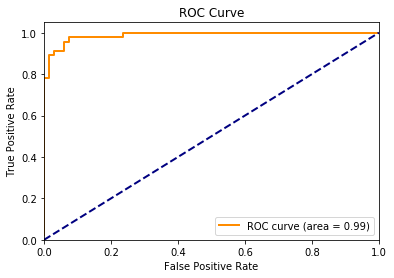

[[41  0]
 [ 8 65]]


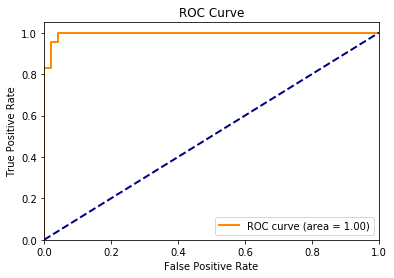

[[36  0]
 [ 4 74]]


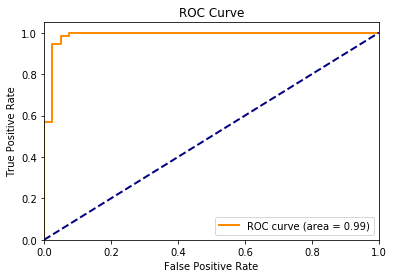

[[28  1]
 [ 1 84]]


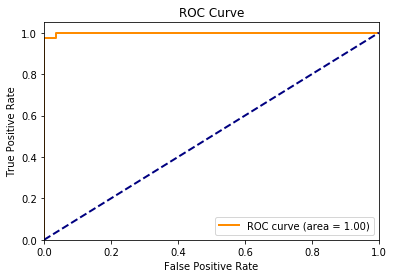

[[26  1]
 [ 0 86]]


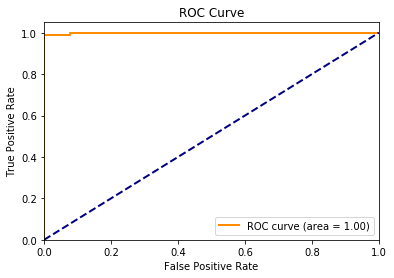

Accuracy: 0.9543704393727681 | Precision: 0.9291092039843047 | Recall: 0.9910003821618603 | F1-Measure: 0.9578514504482583 | AUC: 0.951019502253675


In [31]:
#Dados com normalization
accuracy = 0.0
precision = 0.0
recall = 0.0
f1_measure = 0.0
auc = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_norm[idx_train]
    X_test = X_norm[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_lr.fit(X_train,y_train)
    y_pred = model_lr.predict(X_test)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1_measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    matrix = metrics.confusion_matrix(y_test,y_pred)
    print(matrix.T)
    plot_roc_curve(model_lr,X_test,y_test)
    
accuracy = accuracy / 5
precision = precision / 5
recall = recall / 5
f1_measure = f1_measure / 5
auc = auc / 5
    
print('Accuracy: {} | Precision: {} | Recall: {} | F1-Measure: {} | AUC: {}'
      .format(accuracy,precision,recall,f1_measure,auc))    

#### KNN

In [32]:
model_knn = neighbors.KNeighborsClassifier()

[[61  2]
 [ 7 44]]


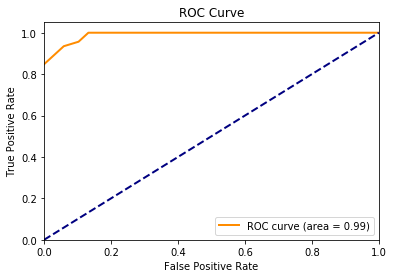

[[46  0]
 [ 3 65]]


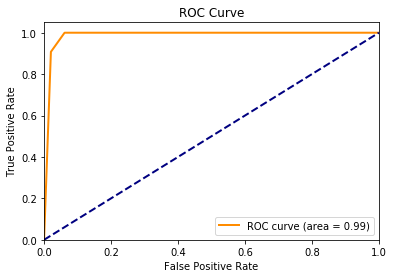

[[36  0]
 [ 4 74]]


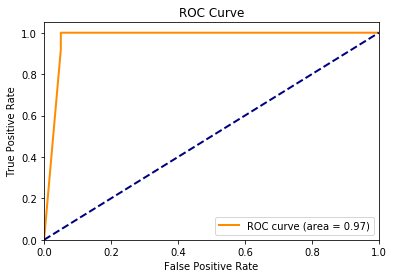

[[27  0]
 [ 2 85]]


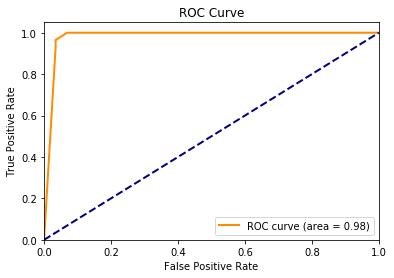

[[26  3]
 [ 0 84]]


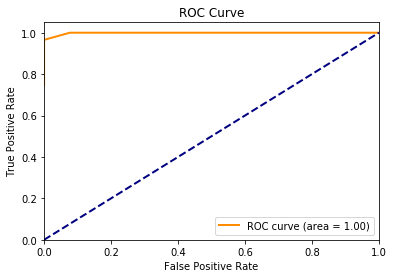

Accuracy: 0.9631113181183046 | Precision: 0.9488713787902429 | Recall: 0.9844077961019491 | F1-Measure: 0.9658345095536731 | AUC: 0.9588907797001859


In [33]:
#Dados com normalization
accuracy = 0.0
precision = 0.0
recall = 0.0
f1_measure = 0.0
auc = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_norm[idx_train]
    X_test = X_norm[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1_measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    matrix = metrics.confusion_matrix(y_test,y_pred)
    print(matrix.T)
    plot_roc_curve(model_knn,X_test,y_test)
    
accuracy = accuracy / 5
precision = precision / 5
recall = recall / 5
f1_measure = f1_measure / 5
auc = auc / 5
    
print('Accuracy: {} | Precision: {} | Recall: {} | F1-Measure: {} | AUC: {}'
      .format(accuracy,precision,recall,f1_measure,auc))    

#### Naive Bayes

In [34]:
model_nb = naive_bayes.GaussianNB()

[[58  4]
 [10 42]]


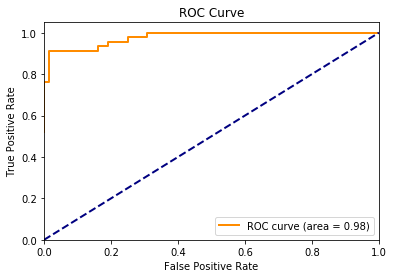

[[43  2]
 [ 6 63]]


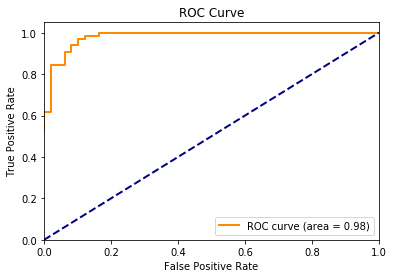

[[37  3]
 [ 3 71]]


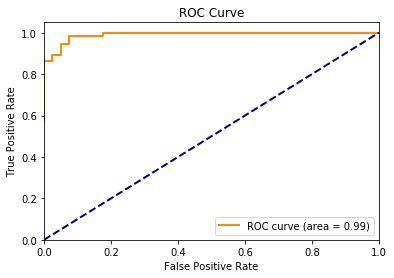

[[27  1]
 [ 2 84]]


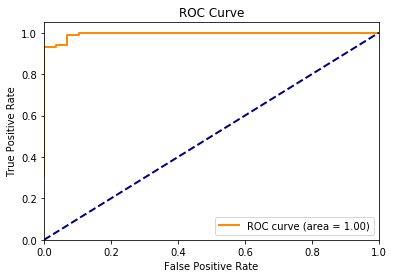

[[24  7]
 [ 2 80]]


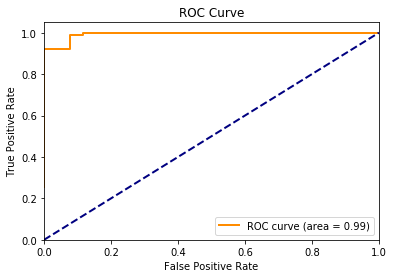

Accuracy: 0.9296848315478963 | Precision: 0.9265098375113417 | Recall: 0.9499018461907605 | F1-Measure: 0.9372205053092115 | AUC: 0.9259112833668098


In [35]:
#Dados com normalization
accuracy = 0.0
precision = 0.0
recall = 0.0
f1_measure = 0.0
auc = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_norm[idx_train]
    X_test = X_norm[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_nb.fit(X_train,y_train)
    y_pred = model_nb.predict(X_test)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1_measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    matrix = metrics.confusion_matrix(y_test,y_pred)
    print(matrix.T)
    plot_roc_curve(model_nb,X_test,y_test)
    
accuracy = accuracy / 5
precision = precision / 5
recall = recall / 5
f1_measure = f1_measure / 5
auc = auc / 5
    
print('Accuracy: {} | Precision: {} | Recall: {} | F1-Measure: {} | AUC: {}'
      .format(accuracy,precision,recall,f1_measure,auc))    

#### SVM

In [36]:
model_svm = svm.SVC(probability=True)

[[52  0]
 [16 46]]


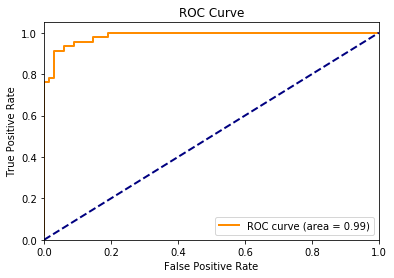

[[40  0]
 [ 9 65]]


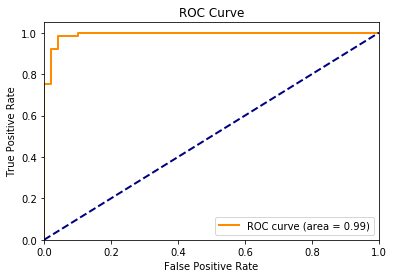

[[36  0]
 [ 4 74]]


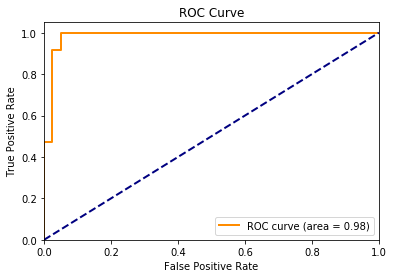

[[27  0]
 [ 2 85]]


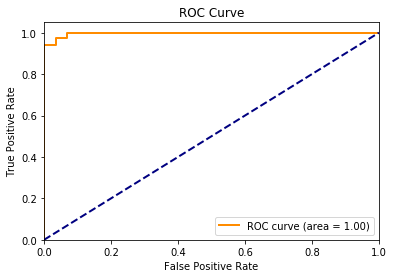

[[24  1]
 [ 2 86]]


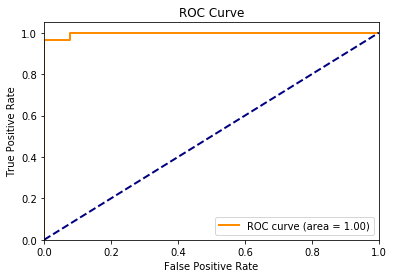

Accuracy: 0.9403043005744449 | Precision: 0.9046632064985791 | Recall: 0.9977011494252874 | F1-Measure: 0.9464034193639435 | AUC: 0.9323649565927168


In [37]:
#Dados com normalization
accuracy = 0.0
precision = 0.0
recall = 0.0
f1_measure = 0.0
auc = 0.0
for idx_train,idx_test in kf.split(X):
    X_train = X_norm[idx_train]
    X_test = X_norm[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    model_svm.fit(X_train,y_train)
    y_pred = model_svm.predict(X_test)
    
    accuracy += metrics.accuracy_score(y_test,y_pred)
    precision += metrics.precision_score(y_test,y_pred)
    recall += metrics.recall_score(y_test,y_pred)
    f1_measure += metrics.f1_score(y_test,y_pred)
    auc += metrics.roc_auc_score(y_test,y_pred)
    matrix = metrics.confusion_matrix(y_test,y_pred)
    print(matrix.T)
    plot_roc_curve(model_svm,X_test,y_test)
    
accuracy = accuracy / 5
precision = precision / 5
recall = recall / 5
f1_measure = f1_measure / 5
auc = auc / 5
    
print('Accuracy: {} | Precision: {} | Recall: {} | F1-Measure: {} | AUC: {}'
      .format(accuracy,precision,recall,f1_measure,auc))    

#### Model Final

In [38]:
model = neighbors.KNeighborsClassifier()

In [39]:
model.fit(X_norm,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
y_pred = model.predict(X_norm)
print(metrics.classification_report(y,y_pred))
print(metrics.accuracy_score(y,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97       212
          1       0.97      1.00      0.98       357

avg / total       0.98      0.98      0.98       569

0.9789103690685413
